<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/4nd_week(Ch.8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8-1.합성곱 신경망의 구성 요소

## 키워드로 끝내는 핵심 포인트
- 합성곱: 입력과 가중치를 곱하고 절편을 더하는 선형 계산, 밀집층과 달리 입력의 일부만 사용
- 합성곱 층의 필터: 밀집층의 뉴런, 필터의 가중치와 절편을 종종 '커널'이라고 부르며 자주 사용되는 커널의 크기는 (3,3) 또는 (5,5). 커널의 깊이는 입력의 깊이와 동일.
  - '뉴런'='필터'='커널'
- 특성 맵(feature map): 합성곱 층이나 풀링 층의 출력 배열(합성곱 계산을 통해 얻은 출력값값), 필터 하나가 하나의 특성 맵을 만든다.
- 패딩: 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀
  - 밸리드 패딩: 패딩을 사용하지 않는 것
  - 세임 패딩: 합성곱 층의 출력 크기를 입력과 동이랗게 만들기 위해 입력에 패딩을 추가하는 것
- 스트라이드: 합성곱 층에서 필터가 입력 위를 이동하는 크기. 일반적으로 1픽셀 사용
- 풀링: 가중치가 없고 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할 수행. 대표적으로 최대 풀링과 평균 풀링이 있으며 (2,2) 풀링으로 입력을 절반으로 줄인다.

## 케라스 합성곱 층



```
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu') # (필터의 개수, 필터 사이즈, 활성화 함수)
```



## 패딩(padding)과 스트라이드(stride)
- 커널 크기를 그대로 두고 출력의 크기를 조절하려면 어떻게 해야할까?? → 입력 배열의 주위를 가상의 원소(0)로 채우는 **패딩** 처리를 한다.
- 가장자리, 특히 모서리에 있는 픽셀은 합성곱에 참여하는 비율이 중앙부에 비해 적다. 패딩을 통해 이 문제를 해결한다.



```
# 세임 패딩을 사용하는 코드
keras.layers.Conv2D(10,kernal_size, activation='relu', padding='same')
```





```
# 스트라이드를 적용한 코드
keras.layers.Conv2D(10,kernal_size, activation='relu', padding='same',strides=1) # 스트라이드 매개변수는 (1,1)과 같이 튜플을 사용해 가로세로 방향을 정할 수 있다.
```



## 풀링(pooling)
- 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 **특성 맵의 개수는 줄이지 않는다.**
- (2,2,3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 가로세로만 줄어들어 (1,1,3) 크기의 특성 맵이 된다.

- 풀링의 종류
  - 최대 풀링: 최댓값 계산
  - 평균 풀링: 평균값 계산



```
# 풀링 크기 2
keras.layers.MaxPooling2D(2)
```





```
# 스트라이드를 2로 설정하면 풀링 크기와 같은 크기로 이동한다.
keras.layers.MaxPooling2D(2, strides=2, padding='valid')
```



## 합성곱 신경망의 전체 구조
- 합성곱 층(세임 패딩) → 풀링층 → 밀집층

### 합성곱 층(세임 패딩)
- 세임 패딩이므로 데이터 주변에 1픽셀씩 추가.
- 활성화 함수로 렐루 함수를 많이 사용용
- **특성 맵 생성**


### 풀링층
- 합성곱 층에서 만든 특성 맵의 가로세로 **크기를 줄인다**.
- 풀링을 사용하는 이유
  - 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문문

### 밀집층
- 밀집층에 전달하기 이전, Flatten 클래스를 통해 3차원 배열을 1차원으로 펼친다.
- 분류할 클래스의 수 만큼 뉴런을 둔 다음, 분류 방법(뉴런의 개수)에 따라 활성화 함수와 손실 함수 적용
  - 이진 분류
    - 활성화 함수: 시그모이드 함수(0,1로 분류)
    - 손실 함수: 이진 크로스 엔트로피(Binary Cross-Entropy)
  - 다중 분류
    - 활성화 함수: 소프트맥스 함수(각 클래스의 확률을 0~1 사이로 정규화)
    - 손실 함수: 다중 크로스 엔트로피(Categorical Cross-Entropy)
  - 다중 레이블 분류
    - 활성화 함수: 시그모이드 함수(0,1로 분류)
    - 손실 함수: 이진 크로스 엔트로피(Binary Cross-Entropy)

## 컬러 이미지를 사용한 합성곱

- 흑백 이미지의 경우 2차원 배열로 표현할 수 있지만, 컬러 이미지는 3차원 배열(R,G,B)로 표시할 수 있다.(너비+높이+깊이/채널)
- 입력이나 필터의 차원이 몇 개인지 상관없이 항상 **출력은 하나의 값!**

# 8-2. 합성곱 신경만을 사용한 이미지 분류

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 핵심 패키지와 함수
### TensorFlow

- **Conv2D**: 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스
  - **첫 번째 매개변수**: 합성곱 필터의 개수
  - **kernel_size 매개변수**: 필터의 커널 크기 지정. (가로, 세로), 커9널의 깊이는 입력의 깊이와 동일하기 때문에 따로 지정 X
  - **strides 매개변수**: 필터의 이동 간격 지정, 기본값은 1
  - **padding 매개변수**: 입력의 패딩 타입을 지정.
    - 기본값 'valid'는 패딩을 하지 않는다.
    - 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가
  - activation 매개변수는 합성곱 층에 적용할 활성화 함수 지정.
- **MaxPooling2D**: 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스
  - **첫 번째 매개변수**: 풀링의 크기 지정 (가로, 세로)
  - **strides 매개변수**: 풀링의 이동 간격 지정. 기본값은 풀링의 크기와 동일하며 입력 위를 겹쳐서 풀링하지 않는다.
  - **padding 매개변수**: 입력의 패딩 타입을 지정.
    - 기본값 'valid'는 패딩을 하지 않는다.
    - 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가
- **plot_model()**: 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장
  - **첫 번째 매개변수**: 케라스 모델 객체 전달
  - **to_file 매개변수**: 파일 이름을 지정하면 그림을 파일로 저장
  - **show_shapes 매개변수**: 매개변수를 True로 입력하면 층의 입력, 출력 크기를 표시. 기본값은 False
  - **show_layer_names 매개변수**: 매개변수를 True로 입력하면 층 이름을 출력. 기본값은 True

  ### matplotlib
  - bar(): 막대그래프 출력

## 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 합성곱 신경망 만들기


In [ ]:
# 첫 번째 합성곱-풀링층 추가
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', # 32개의 필터 사용, 커널 크기 (3,3), 렐루 활성화 함수와 세임 패딩 사용
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 두 번째 합성곱-풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 최종 특성 맵의 크기는 (7,7,64)

In [ ]:
# 3차원 특성 맵을 일렬로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층(다중 분류 문제이므로 활성화 함수로 소프트맥스 사용)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 되고, 두 번째 합성곱에서 특성 맵의 크기가 64로 증가.   
반면 특성 맵의 가로세로 크기는 첫 번째 풀링 층에서 절반으로 줄어들고, 두 번째 풀링 층에서 다시 절반으로 줄어든다.

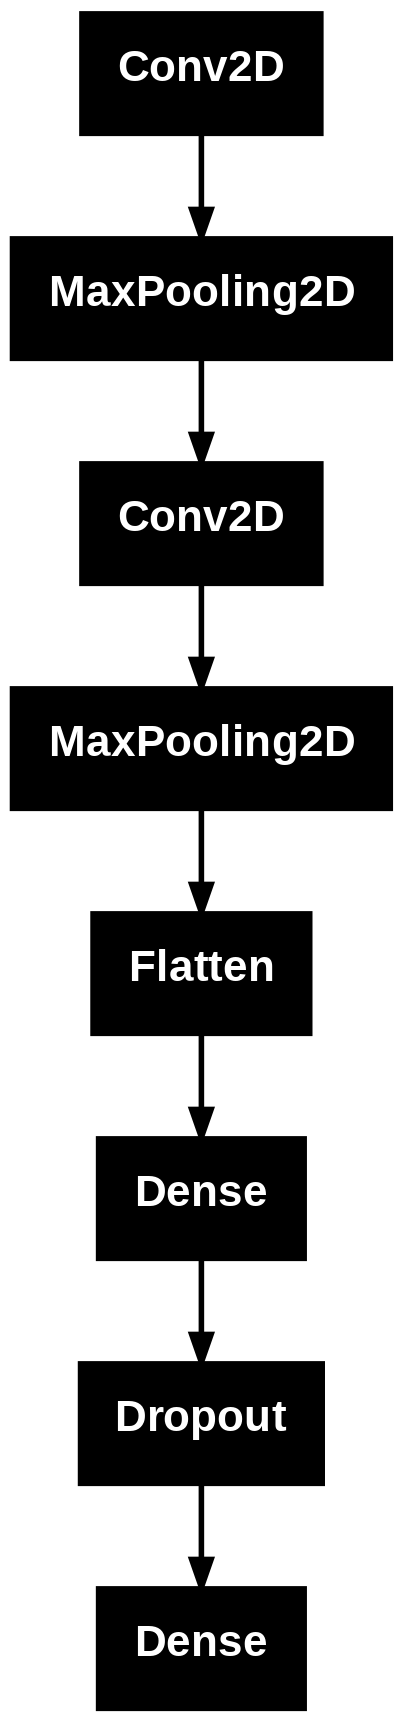

In [ ]:
keras.utils.plot_model(model)

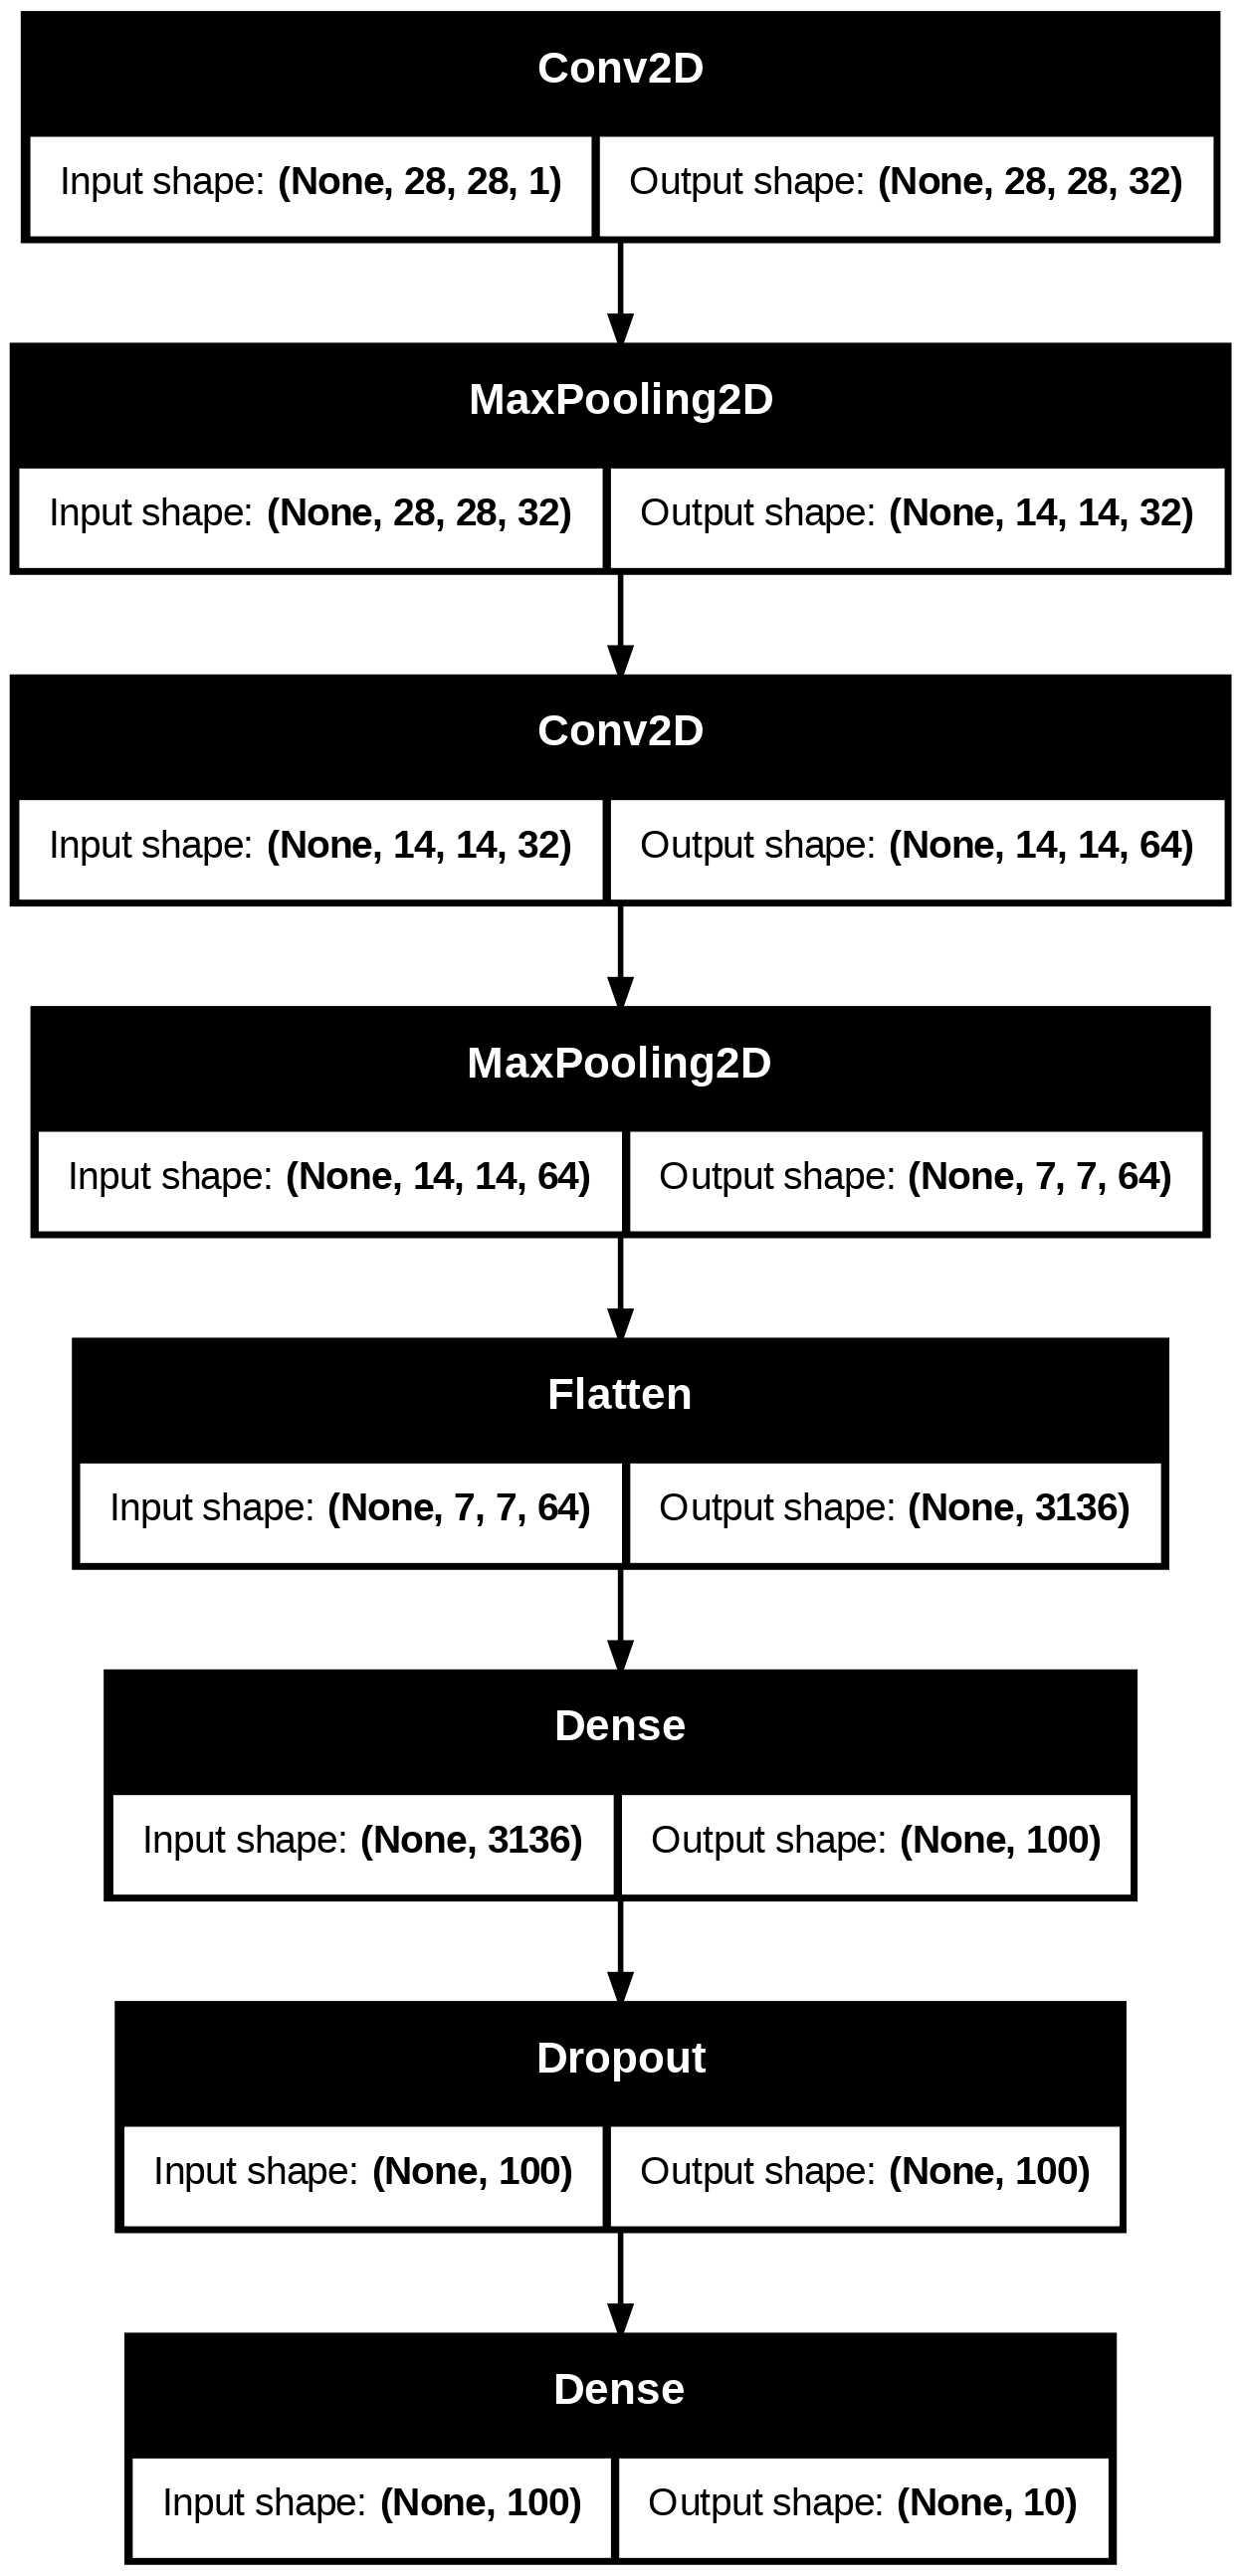

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

케라스 API의 장점: 딥런이 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 동일

In [ ]:
# 모델을 컴파일하는 코드
model.compile(optimizer='adam',  # Adam 옵티마이저 사용
              loss='sparse_categorical_crossentropy',  # 다중 클래스 분류를 위한 손실 함수
              metrics=['accuracy'])  # 평가 지표로 정확도(accuracy) 사용

# 체크포인트 콜백: 모델이 개선될 때마다 가중치를 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)  # 가장 성능이 좋은 모델만 저장

# 조기 종료 콜백: 검증 손실이 더 이상 개선되지 않으면 학습 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,  # 개선되지 않는 epoch이 2회 연속 발생하면 중단
                                                  restore_best_weights=True)  # 가장 좋은 가중치로 복원

# 모델 학습 진행
history = model.fit(train_scaled, train_target,  # 훈련 데이터 및 타겟 값
                    epochs=20,  # 최대 20 epoch 학습
                    validation_data=(val_scaled, val_target),  # 검증 데이터 제공
                    callbacks=[checkpoint_cb, early_stopping_cb])  # 체크포인트와 조기 종료 콜백 사용


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.7491 - loss: 0.7010 - val_accuracy: 0.8798 - val_loss: 0.3188
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.8699 - loss: 0.3536 - val_accuracy: 0.8922 - val_loss: 0.2796
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.8904 - loss: 0.3045 - val_accuracy: 0.9027 - val_loss: 0.2541
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9029 - loss: 0.2651 - val_accuracy: 0.9069 - val_loss: 0.2453
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.9102 - loss: 0.2425 - val_accuracy: 0.9137 - val_loss: 0.2347
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9195 - loss: 0.2214 - val_accuracy: 0.9184 - val_loss: 0.2315
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9216 - loss: 0.2055 - val_accuracy: 0.9190 - val_loss: 0.2249
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 42ms/step - accuracy: 0.9322 -

In [ ]:
import matplotlib.pyplot as plt

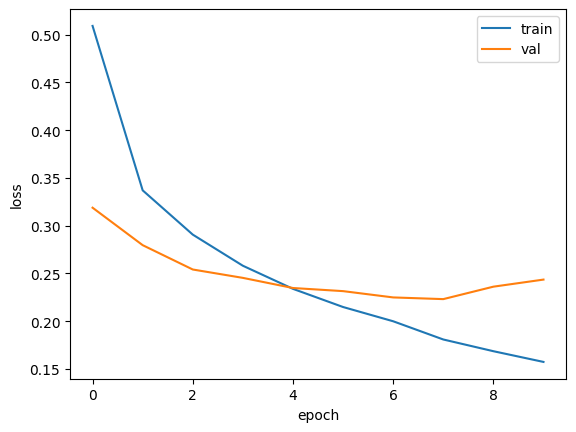

In [ ]:
# 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9205 - loss: 0.2147


[0.2230951189994812, 0.9204166531562805]

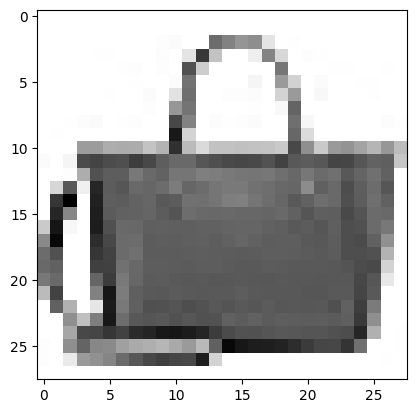

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# 각 클래스에 대한 예측 확률 추정
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[2.1348961e-17 3.5225748e-25 1.5923116e-23 1.8117919e-19 1.2107247e-23
  1.5345780e-18 2.9745930e-22 2.1957572e-20 1.0000000e+00 5.5991484e-22]]


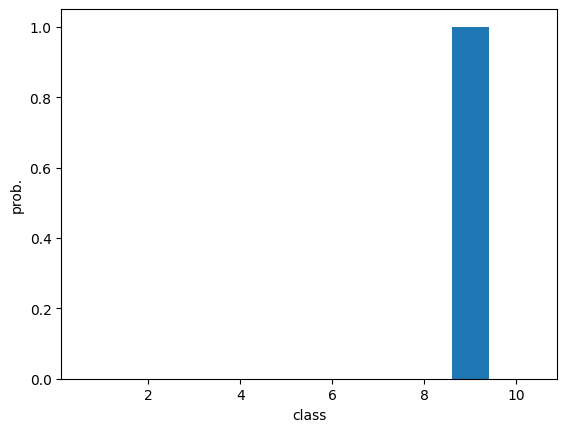

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9143 - loss: 0.2646


[0.24823877215385437, 0.9158999919891357]

# 8-3. 합성곱 신경망의 시각화

## 키워드로 끝내는 핵심 포인트
- **가중치 시각화**: 합성곱 층의 가중치를 이미지로 출력하는 것. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있다.
- **특성 맵 시각화** 합성곱 층의 활성화 출력을 이미지로 그리는 것. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있다.
- **함수형 API** 케라스에서 신경망 모델을 만드는 방법 중 하나. Model 클래스에 모델의 입력과 출력 지정. 전형적으로 입력은 Input() 함수를 사용하여 정의하고, 출력은 마지막 층의 출력으로 정의

## 핵심 패키지와 함수
### TensorFlow
- **Model**: 케라스 모델을 만드는 클래스
  - 첫 번째 매개변수인 inputs에 모델의 입력 또는 입력의 리스트 지정
  - 두 번째 매개변수인 outputs에 모델의 출력 또는 출력의 리스트 지정
  - name 매개변수에 모델의 이름 지정


In [2]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 가중치 시각화

In [3]:
from tensorflow import keras

In [4]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-02-28 08:08:45--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-02-28 08:08:46--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.05s   

2025-02-28 08:08:46 (75.5 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [5]:
model = keras.models.load_model('best-cnn-model.keras')

In [6]:
# layers 속성에 저장된, 케라스 모델에 추가한 층 출력하기
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [7]:
# 첫 번째 합성곱 층의 가중치 조사하기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 층의 가중치와 절편은 층의 weights 속성에 저장되어 있다. weights 속성의 첫 번째 원소가 가중치, 두 번째 원소가 절편

(3, 3, 1, 32) (32,)


In [8]:
# 가중치 배열의 평균과 표준편차 구하기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.014383553 0.23351653


In [9]:
import matplotlib.pyplot as plt

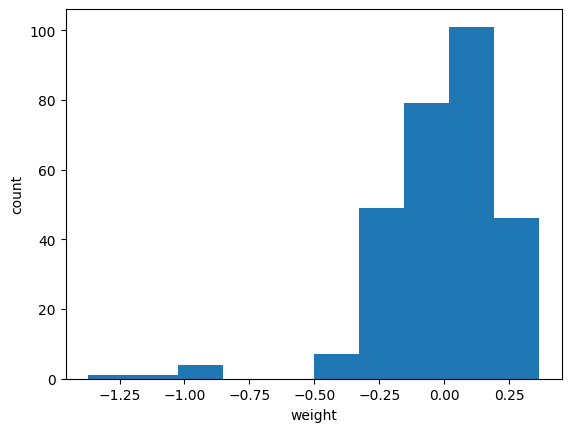

In [10]:
# 가중치 배열의 분포를 히스토그램으로 확인
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

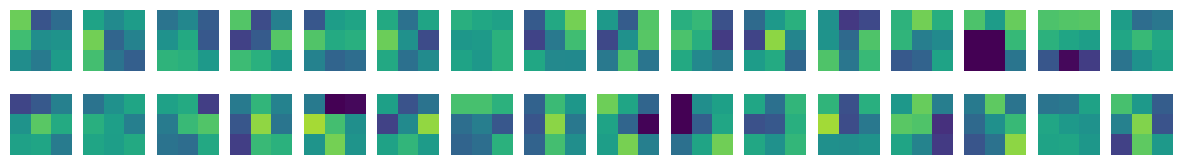

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

### 훈련하지 않은 빈 합성곱 신경망 만들기

In [12]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


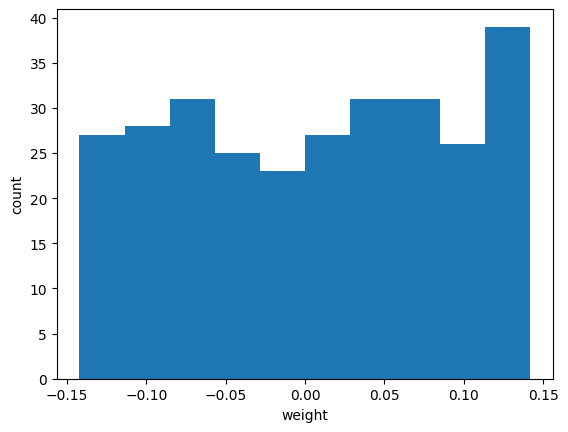

In [15]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

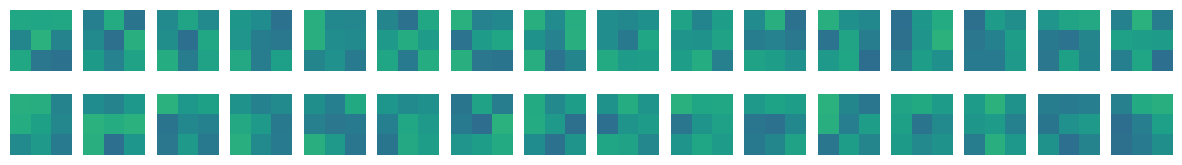

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

- 입력이 2개고 출력이 2개인 경우 함수형 API를 사용
- 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만든다.
- 함수형 API는 모델 구조를 정의한 후 연결하는 방식이다.

- Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현해 보기
1. 2개의 Dense 층 객체를 만들기(정의하기)
```python
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')
```

2. 정의된 Dense 층을 함수처럼 사용하기
```python
hidden = dense1(inputs) # input 데이터를 dense1 층을 통해 hidden 데이터(은닉층)로 출력
outputs = dense2(hidden) # hidden 데이터를 dense2 층을 통해 output 데이터(출력층)로 출력
```

3. inputs와 outputs을 Model 클래스로 연결해주기
```python
model = keras.Model(inputs, outputs)
```

4. inputs 값
- inputs는 InputLayer 클래스의 출력값
```python
inputs = keras.Input(shape(784,))

In [20]:
# model 객체의 입력을 얻는 법
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [21]:
# model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들기
conv_acti = keras.Model(model.inputs, model.layers[0].output)

## 특성 맵 시각화

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


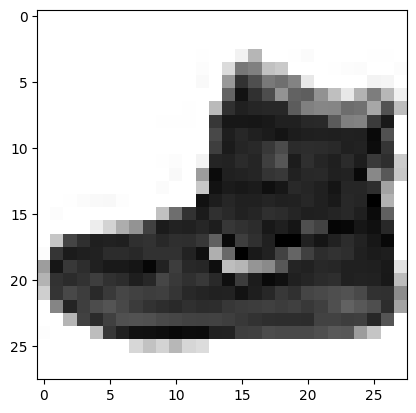

In [22]:
# 케라스로 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플 그리기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

### 첫 번째 합성곱 층이 만든 특성 맵 확인

In [23]:
# 위 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵 출력하기
# predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대하기 때문에, 슬라이실 연산자를 사용해 첫 번째 샘픙르 선택하고 크기 변경한 뒤 255로 나누기
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [24]:
# feature_maps의 크기 확인하기
print(feature_maps.shape) -- 첫 번째 차원은 배치 차원으로, 샘플을 하나 입력했기 때문에 1. 따라서 출력 크기는 (28,28,32)

(1, 28, 28, 32)


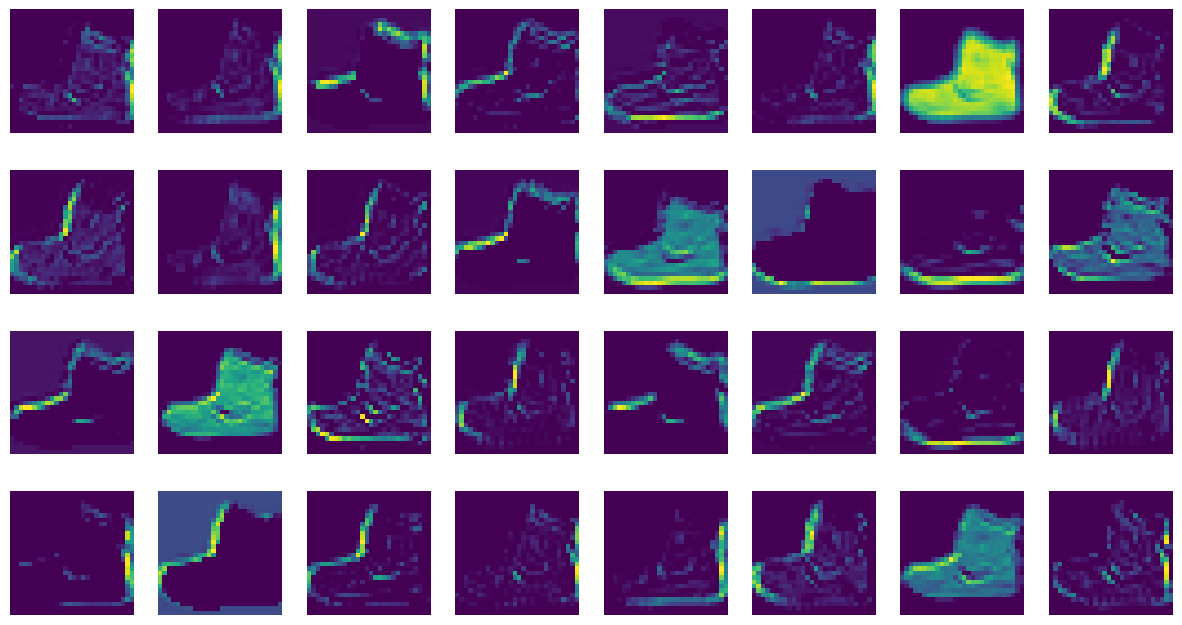

In [25]:
# matplotlib의 imshow 함수로 특성 맵 그리기
import matplotlib.pyplot as plt

# 4x8의 서브플롯을 생성 (총 32개의 작은 그래프)
fig, axs = plt.subplots(4, 8, figsize=(15, 8))

# 4행 8열의 서브플롯을 반복하며 feature map을 시각화
for i in range(4):  # 행 루프
    for j in range(8):  # 열 루프
        # 각 서브플롯에 feature map을 이미지 형태로 표시
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])

        # 축(눈금)을 숨겨서 깔끔하게 표시
        axs[i, j].axis('off')

# 그래프 출력
plt.show()


### 두 번째 합성곱 층이 만든 특성 맵 확인

In [26]:
# model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 만들기
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [28]:
# 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [29]:
# feature_maps 크기 확인
print(feature_maps.shape)

(1, 14, 14, 64)


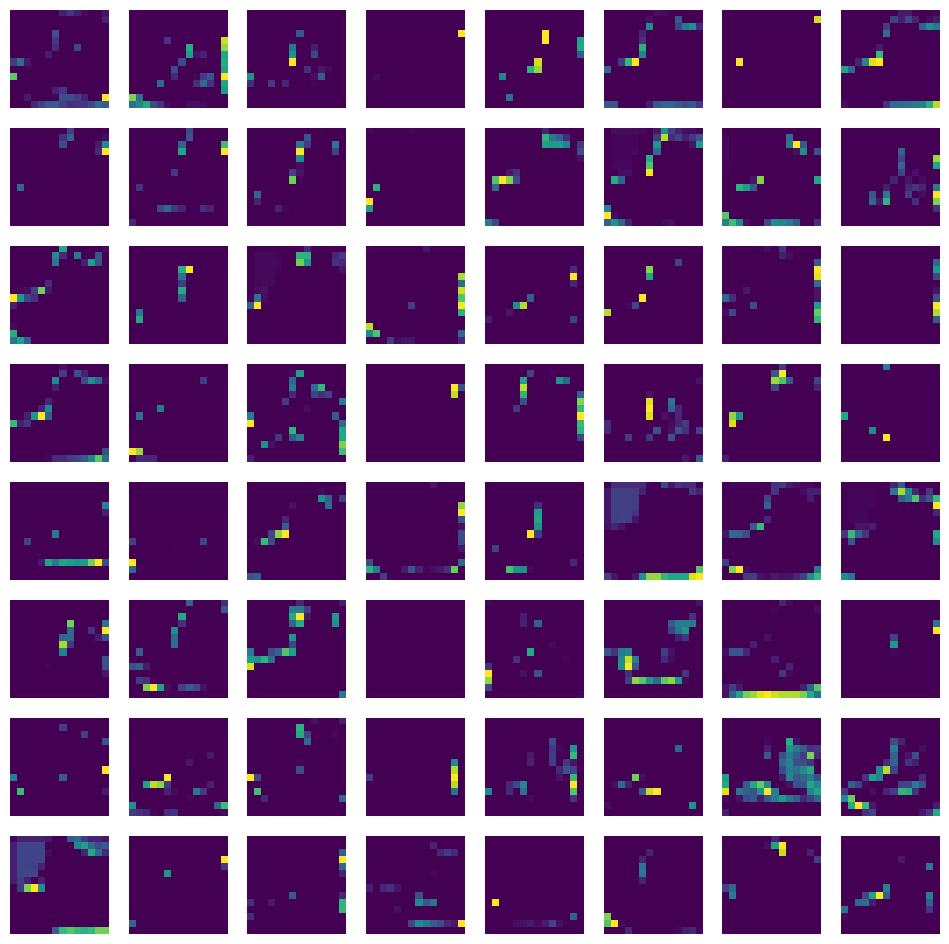

In [30]:
# matplotlib의 imshow 함수로 특성 맵 그리기
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()